# WeatherPy
----

### Analysis
* Data shows a larger sample of cities above the equator eventhough the coordinates were random.
* The closer the city is to the equator, the higher max temperature. The further away from the equator, the lower the max temperature.
* There is no strong relationship between latitude and humidity. There are numerous cities with 100% humidity throughout the range of latitudes.
* There is no strong relationship between latitude and cloudiness.
* There is no strong relationship between latitude and wind speed but the higher wind speeds appear towards the furthest points away from the equator.

---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a DataFrame to lat, lon 
column_names = ["City", "Country"]
cities_df = pd.DataFrame(columns = column_names)

## Generate Cities List

In [2]:
# Randomly generate a list of 2000 cities
for x in range(2000):
    lat, lng = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lng)
    cities_df = cities_df.append({"City": city.city_name,"Country": city.country_code,}, ignore_index=True)

# Remove duplicate cities
cities_df = cities_df.drop_duplicates(subset='City').reset_index()
cities_df.count()

index      753
City       753
Country    753
dtype: int64

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Create a DataFrame to add all the data from the API calls.
column_names = ["City", "Country","Max Temp",
                "Latitude","Longitude","Humidity",
                "Cloudiness", "Wind Speed"]
final_cities_df = pd.DataFrame(columns=column_names)

# Loop through the list of cities and add the data to the DataFrame.
url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 1

print("Beginning Data Retrieval")
for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("City not found. Skipping...")

    else:
        final_cities_df.set_value(index, "City", city_data["name"])
        final_cities_df.set_value(index, "Country", city_data["sys"]["country"])
        final_cities_df.set_value(index, "Max Temp", city_data["main"]["temp_max"])
        final_cities_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        final_cities_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        final_cities_df.set_value(index, "Humidity", city_data["main"]["humidity"])
        final_cities_df.set_value(index, "Cloudiness", city_data["clouds"]["all"])
        final_cities_df.set_value(index, "Wind Speed", city_data["wind"]["speed"])
        
        print("------------------------")
        print("Processing Record #" , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(target_url)
        row_count += 1

Beginning Data Retrieval
------------------------
Processing Record # 1  |  Eirunepe BR
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=eirunepe


C:\Users\tomkh\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\tomkh\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\tomkh\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\tomkh\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\tomkh\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future rele

------------------------
Processing Record # 2  |  Saint-Philippe CA
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=saint-philippe
------------------------
Processing Record # 3  |  Abha SA
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=abha
------------------------
Processing Record # 4  |  Gat SN
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=gat
------------------------
Processing Record # 5  |  Camocim BR
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=camocim
------------------------
Processing Record # 6  |  Atuona PF
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=atuona
------------------------
Processing Record # 7  |  Belmonte PT
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e508

------------------------
Processing Record # 48  |  Itaueira BR
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=itaueira
------------------------
Processing Record # 49  |  Souillac FR
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=souillac
------------------------
Processing Record # 50  |  Mahebourg MU
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=mahebourg
------------------------
Processing Record # 51  |  Dikson RU
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=dikson
------------------------
Processing Record # 52  |  Bolobo CD
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=bolobo
------------------------
Processing Record # 53  |  Bulaevo KZ
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d

------------------------
Processing Record # 94  |  Laguna MX
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=laguna
------------------------
Processing Record # 95  |  Grand Gaube MU
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=grand+gaube
------------------------
Processing Record # 96  |  Bandarbeyla SO
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=bandarbeyla
------------------------
Processing Record # 97  |  Cosamaloapan MX
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=cosamaloapan
------------------------
Processing Record # 98  |  Pevek RU
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=pevek
------------------------
Processing Record # 99  |  Sitka US
http://api.openweathermap.org/data/2.5/weather?ap

------------------------
Processing Record # 141  |  Deputatskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=deputatskiy
------------------------
Processing Record # 142  |  Port Moresby PG
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=port+moresby
------------------------
Processing Record # 143  |  Springbok ZA
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=springbok
City not found. Skipping...
------------------------
Processing Record # 144  |  Samarai PG
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=samarai
City not found. Skipping...
------------------------
Processing Record # 145  |  Maldonado UY
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=maldonado
------------------------
Processing Record 

------------------------
Processing Record # 187  |  Ouallam NE
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=ouallam
------------------------
Processing Record # 188  |  Takab IR
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=takab
------------------------
Processing Record # 189  |  Sao Joao da Barra BR
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=sao+joao+da+barra
------------------------
Processing Record # 190  |  Nikolskoye RU
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=nikolskoye
------------------------
Processing Record # 191  |  Sechura PE
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=sechura
------------------------
Processing Record # 192  |  Kruisfontein ZA
http://api.openweathermap.org/data

------------------------
Processing Record # 233  |  Agirish RU
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=agirish
------------------------
Processing Record # 234  |  Ostrovnoy RU
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=ostrovnoy
City not found. Skipping...
------------------------
Processing Record # 235  |  Wenling CN
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=wenling
------------------------
Processing Record # 236  |  Torbay CA
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=torbay
City not found. Skipping...
------------------------
Processing Record # 237  |  Lompoc US
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=lompoc
------------------------
Processing Record # 238  |  San Jeronimo PE


------------------------
Processing Record # 278  |  Clyde River CA
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=clyde+river
------------------------
Processing Record # 279  |  Popondetta PG
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=popondetta
------------------------
Processing Record # 280  |  Geraldton CA
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=geraldton
------------------------
Processing Record # 281  |  Araouane ML
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=araouane
------------------------
Processing Record # 282  |  Nador MA
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=nador
------------------------
Processing Record # 283  |  Paramonga PE
http://api.openweathermap.org/data/2.5/weat

------------------------
Processing Record # 324  |  Baft IR
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=baft
------------------------
Processing Record # 325  |  Vila IT
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=vila
------------------------
Processing Record # 326  |  Cabatuan PH
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=cabatuan
------------------------
Processing Record # 327  |  Xining CN
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=xining
------------------------
Processing Record # 328  |  Villablino ES
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=villablino
------------------------
Processing Record # 329  |  Keetmanshoop NA
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5

------------------------
Processing Record # 371  |  Clarksburg US
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=clarksburg
------------------------
Processing Record # 372  |  Goderich CA
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=goderich
------------------------
Processing Record # 373  |  Kyren RU
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=kyren
------------------------
Processing Record # 374  |  Skjervoy NO
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=skjervoy
------------------------
Processing Record # 375  |  Kajaani FI
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=kajaani
------------------------
Processing Record # 376  |  Yagodnoye RU
http://api.openweathermap.org/data/2.5/weather?appid=

------------------------
Processing Record # 417  |  Sokolo ML
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=sokolo
------------------------
Processing Record # 418  |  Okhotsk RU
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=okhotsk
City not found. Skipping...
City not found. Skipping...
------------------------
Processing Record # 419  |  Marseille FR
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=marseille
------------------------
Processing Record # 420  |  Goya AR
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=goya
------------------------
Processing Record # 421  |  Genhe CN
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=genhe
------------------------
Processing Record # 422  |  Prince Rupert CA
http://

------------------------
Processing Record # 463  |  Muncar ID
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=muncar
------------------------
Processing Record # 464  |  Mackenzie CA
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=mackenzie
------------------------
Processing Record # 465  |  Alagoa Grande BR
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=alagoa+grande
------------------------
Processing Record # 466  |  Mecca SA
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=mecca
------------------------
Processing Record # 467  |  Buenavista CO
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=buenavista
------------------------
Processing Record # 468  |  Barra do Corda BR
http://api.openweathermap.org/data/2.5

------------------------
Processing Record # 510  |  Dom Pedrito BR
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=dom+pedrito
------------------------
Processing Record # 511  |  Boa Vista BR
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=boa+vista
------------------------
Processing Record # 512  |  Bamako ML
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=bamako
------------------------
Processing Record # 513  |  Finschhafen PG
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=finschhafen
------------------------
Processing Record # 514  |  Clonakilty IE
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=clonakilty
------------------------
Processing Record # 515  |  Curanilahue CL
http://api.openweathermap.org/dat

------------------------
Processing Record # 556  |  Ilulissat GL
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=ilulissat
------------------------
Processing Record # 557  |  Kuznechikha RU
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=kuznechikha
------------------------
Processing Record # 558  |  Praia BR
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=praia
City not found. Skipping...
------------------------
Processing Record # 559  |  Teguise ES
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=teguise
------------------------
Processing Record # 560  |  Broome GB
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=broome
------------------------
Processing Record # 561  |  Palmer AU
http://api.openweathermap.or

------------------------
Processing Record # 602  |  Coxim BR
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=coxim
------------------------
Processing Record # 603  |  Svetlogorsk RU
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=svetlogorsk
------------------------
Processing Record # 604  |  Pochutla MX
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=pochutla
------------------------
Processing Record # 605  |  Esfarayen IR
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=esfarayen
------------------------
Processing Record # 606  |  Najran SA
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=najran
------------------------
Processing Record # 607  |  Gladstone AU
http://api.openweathermap.org/data/2.5/weather?appi

------------------------
Processing Record # 648  |  Dongsheng CN
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=dongsheng
------------------------
Processing Record # 649  |  Kemin KG
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=kemin
------------------------
Processing Record # 650  |  Galveston US
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=galveston
------------------------
Processing Record # 651  |  Vilyuysk RU
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=vilyuysk
------------------------
Processing Record # 652  |  Perth GB
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=perth
------------------------
Processing Record # 653  |  Meulaboh ID
http://api.openweathermap.org/data/2.5/weather?appid=acf85

In [5]:
# Get count of all data
final_cities_df.count()

City          676
Country       676
Max Temp      676
Latitude      676
Longitude     676
Humidity      676
Cloudiness    676
Wind Speed    676
dtype: int64

In [6]:
#Reset the index
final_cities_df = final_cities_df.reset_index()
del final_cities_df['index']
final_cities_df.head()

,City,Country,Max Temp,Latitude,Longitude,Humidity,Cloudiness,Wind Speed
0,Eirunepe,BR,80.12,-6.66,-69.87,87,36,2.35
1,Saint-Philippe,CA,8.01,45.36,-73.48,50,1,13.87
2,Abha,SA,62.6,18.22,42.5,82,0,4.7
3,Gat,SN,71.6,14.69,-16.54,43,12,11.41
4,Camocim,BR,77.51,-2.9,-40.84,93,92,4.76


In [7]:
# Save data to a CSV file
final_cities_df.to_csv("../starter_code/Analysis/city_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

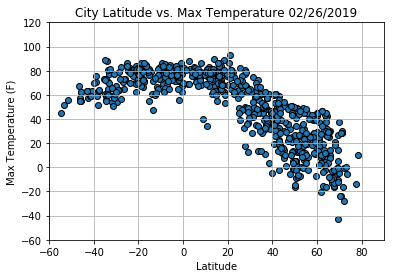

In [8]:
# Create scatterplot for latitude vs Max Temp

plt.scatter(final_cities_df["Latitude"], final_cities_df["Max Temp"], 
            marker = "o", edgecolors = "black")
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-60, 90)
plt.ylim(-60, 120)
plt.grid(True)

# Save figure
plt.savefig("../starter_code/Analysis/Latitude_Temperature.png")

#### Latitude vs. Humidity Plot

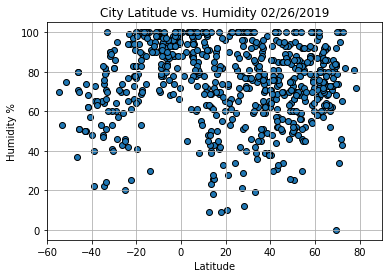

In [9]:
# Create scatterplot for latitude vs Humidity

plt.scatter(final_cities_df["Latitude"], final_cities_df["Humidity"], 
            marker = "o", edgecolors = "black")
plt.title(f"City Latitude vs. Humidity {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.xlim(-60, 90)
plt.ylim(-5, 105)
plt.grid(True)

# Save figure
plt.savefig("../starter_code/Analysis/Latitude_Humidity.png")

#### Latitude vs. Cloudiness Plot

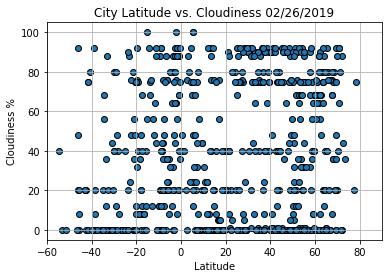

In [10]:
# Create scatterplot for latitude vs cloudiness

plt.scatter(final_cities_df["Latitude"], final_cities_df["Cloudiness"], 
            marker = "o", edgecolors = "black")
plt.title(f"City Latitude vs. Cloudiness {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.xlim(-60, 90)
plt.ylim(-5, 105)
plt.grid(True)

# Save figure
plt.savefig("../starter_code/Analysis/Latitude_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

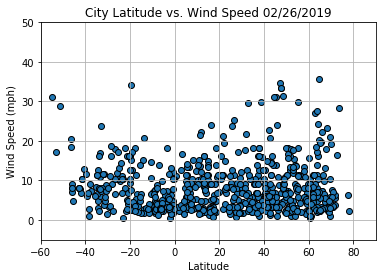

In [11]:
# Create scatterplot for latitude vs wind speed

plt.scatter(final_cities_df["Latitude"], final_cities_df["Wind Speed"], 
            marker = "o", edgecolors = "black")
plt.title(f"City Latitude vs. Wind Speed {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-60, 90)
plt.ylim(-5, 50)
plt.grid(True)

# Save figure
plt.savefig("../starter_code/Analysis/Latitude_Wind.png")